# Guided Project: Predicting Car Prices

## Introduction to the data set

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
# list of column names
columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

cars = pd.read_csv('imports-85.data', names=columns)

In [3]:
# preview dataset
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


We'll stick with the columns with continuous values as listed in the dataset info (https://archive.ics.uci.edu/ml/datasets/automobile)

In [4]:
cont_cols = ['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
numeric_cars = cars[cont_cols]

In [5]:
# review subsetted dataset
numeric_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,?


## Data Cleaning

In [6]:
# replace ? with NaN
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,NaN


In [7]:
# recast object columns as numeric
numeric_cars = numeric_cars.astype('float')

In [8]:
# confirm recast
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [9]:
# check for missing values
numeric_cars['normalized_losses'].isnull().sum()

41

In [10]:
# drop any rows missing price values since that is the value we're going to predict
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [11]:
# replace remaining missing values with means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
# normalize values except for target column
target = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = target

In [13]:
# review normalization
numeric_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate Model

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # shuffle index
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # split dataset in half
    mid_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:mid_row]
    test_df = rand_df.iloc[mid_row:]
    
    # train model
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # make predictions
    predictions = knn.predict(test_df[[train_col]])
    
    # calculate mse, rmse
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [15]:
# run features through function
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
# convert dict to series for easier data manipulation
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()


engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [16]:
# add k parameter to function
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    # shuffle index
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # split dataset in half
    mid_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:mid_row]
    test_df = rand_df.iloc[mid_row:]
    
    # add k value tests
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # train model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # make predictions
        predictions = knn.predict(test_df[[train_col]])

        # calculate mse, rmse
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse 
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `k_rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.849263088

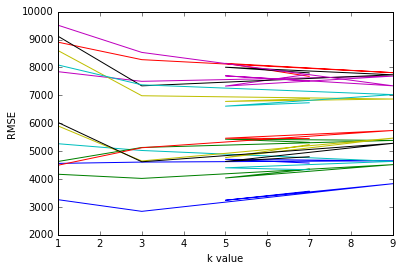

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate Model

In [21]:
# calculate average RMSE for each feature from last step; sort ascending
feature_avg_rmse = {}

for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

engine_size          3346.484586
horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

In [25]:
# modified for multivariate test
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # shuffle index
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # split dataset in half
    mid_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:mid_row]
    test_df = rand_df.iloc[mid_row:]
    
    # add k value tests
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # train model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # make predictions
        predictions = knn.predict(test_df[train_cols])

        # calculate mse, rmse
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse 
    return k_rmses

k_rmse_results = {}

two_best_features = ['engine_size', 'horsepower']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['engine_size', 'horsepower', 'width']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['engine_size','horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['engine_size','horsepower', 'width', 'curb_weight' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['engine_size','horsepower', 'width', 'curb_weight' , 'highway_mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3410.2170133901805},
 'four best features': {5: 3487.340917327035},
 'six best features': {5: 3478.510890118539},
 'three best features': {5: 3580.7376651928435},
 'two best features': {5: 2949.8817277180374}}

## Hyperparameter Tuning

In [27]:
# modified for hyperparameter tuning
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # shuffle index
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # split dataset in half
    mid_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:mid_row]
    test_df = rand_df.iloc[mid_row:]
    
    # add k value tests
    k_values = [x for x in range(1,25)]
    k_rmses = {}
    
    for k in k_values:
        # train model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # make predictions
        predictions = knn.predict(test_df[train_cols])

        # calculate mse, rmse
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse 
    return k_rmses

k_rmse_results = {}

two_best_features = ['engine_size', 'horsepower']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

four_best_features = ['engine_size','horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

six_best_features = ['engine_size','horsepower', 'width', 'curb_weight' , 'highway_mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'four best features': {1: 2952.725686581471,
  2: 3131.704952720018,
  3: 3129.692821910155,
  4: 3241.4320776448717,
  5: 3487.340917327035,
  6: 3637.0381471429987,
  7: 3606.195077860286,
  8: 3809.9307026308247,
  9: 3875.274902378068,
  10: 3997.1583055842293,
  11: 4162.564050411074,
  12: 4289.486490995821,
  13: 4368.061602779942,
  14: 4416.304772968801,
  15: 4434.013914355171,
  16: 4441.4634909198785,
  17: 4512.996303789127,
  18: 4523.575629742228,
  19: 4534.834065236792,
  20: 4620.211598150367,
  21: 4688.356509517293,
  22: 4731.46717779913,
  23: 4763.535312989311,
  24: 4751.601375872476},
 'six best features': {1: 2912.5938237554196,
  2: 3166.153231001023,
  3: 2946.297423963006,
  4: 3236.6679708979473,
  5: 3478.510890118539,
  6: 3682.857366242685,
  7: 3808.4181311071566,
  8: 3957.028825824177,
  9: 4013.900021606101,
  10: 4048.9976278453205,
  11: 4156.133694401285,
  12: 4195.095896609745,
  13: 4304.728620848299,
  14: 4379.114229728139,
  15: 4448.24947

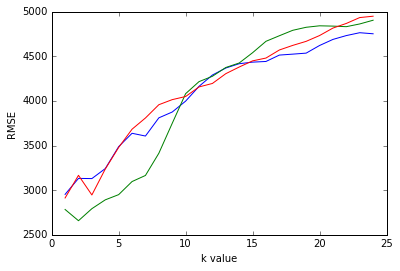

In [28]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Next steps

- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
- Modify the knn_train_test() function to perform the data cleaning as well.
